Logistic Regression Algorithm
Red 'x' means student failed, and green 'o' means student was approved: 


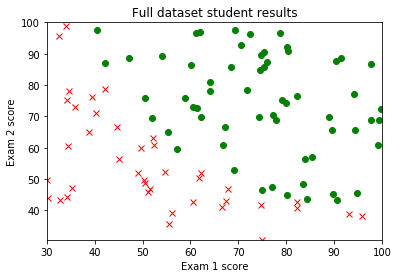


Training set:


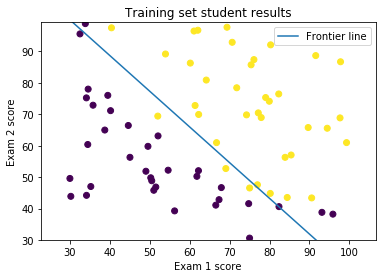

Model performance on the training set (precision): 0.9041095890410958

Testing set:


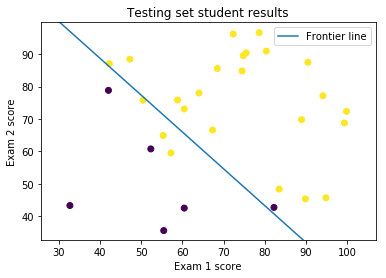

Model performance on the training set (precision): 86.66666666666667 %

New prediction: 
[1]


In [457]:
# Import Libraries
import string, math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
np.seterr(all = 'warn') 
%matplotlib inline


# Function to get and divide dataset into y(Blood pressure) and X (Age)
def preprocess():
    f = open("grades_data.txt", "r")
    if f.mode == 'r':
        # Read dataset
        contents = f.read()
        dataset = np.array([[float(j) for j in i.split(',')] for i in contents.splitlines()])

        # Separate features from results 
        X, y = dataset[:, :-1], dataset[:, 2:]
        y = y.astype(int)
        print("Logistic Regression Algorithm")
        print("Red 'x' means student failed, and green 'o' means student was approved: ")
        
        # Plotting the 
        plt.title("Full dataset student results")
        plt.xlabel('Exam 1 score')
        plt.ylabel('Exam 2 score')
        for i in range(len(X)):
            if y[i] == 1:
                plt.plot(X[i,0],X[i,1], 'go')
            else:
                plt.plot(X[i,0],X[i,1], 'rx')
        plt.axis([min(X[:,0]), 100, min(X[:,1]), 100])

        plt.show()
        
        # Divide dataset into test set (70%) and train set (30%) and separate into x_train, y_train, x_test, y_test
        x_train, x_test = np.split(X,[int((0.7 * len(X)))])
        y_train, y_test = np.split(y,[int((0.7 * len(y)))])
        
        return x_train, y_train, x_test, y_test

# Logistic regression function
def sigmoid(matrix):
    return 1.0 / (1 + np.exp(-matrix))

def logistic_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

# Function to make the Gradient Descent operation
def gradient_descent(x_train, y_train, step_size, iterations):
    # Initialize wieghts array to ones
    w = np.zeros((2,1))
    b = np.zeros((1,1))
    m = len(y_train)
    # Training process
    for epoch in range(iterations):
        z = np.matmul(x_train, w) + b
        a = sigmoid(z)
        loss = logistic_loss(y_train, a)
        
        # Back propagation
        dz = a - y_train
        dw = 1/m * np.matmul(x_train.T, dz)
        db = np.sum(dz)

        # Gradient descent update 
        w = w - step_size * dw
        b = b - step_size * db
 
        # Uncomment to check the loss reduction on the training 
        # if epoch % 100 == 0:
        #   print(loss)

    # Plot training results
    plt.title("Training set student results")
    plot(x_train, y_train, bias_array, w_array)

    # Check model performance
    preds = []
    for i in sigmoid(z):
        if i > 0.5:
            preds.append(1)
        else:
            preds.append(0)
            
    print('Model performance on the training set (precision):',f1_score(preds, y_train))
    
    return w, b, z

# Plot results 
def plot(x, y, b, w):
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(x[:,0], x[:,1], c = y.ravel())
    ax = plt.gca()
    xvals = np.array(ax.get_xlim()).reshape(-1,1)
    yvals = -(xvals * w[0][0] + b) / w[1][0]
    plt.plot(xvals, yvals)
    plt.ylim(np.amin(x), np.amax(x))
    plt.legend(['Frontier line'])
    plt.show()

# Predict wheter a student will pass or not
def predict(x, w, b):
    z = np.matmul(x, w) + b
    a = sigmoid(z)
    test_preds = []
    for i in sigmoid(z):
        if i > 0.5:
            test_preds.append(1)
        else:
            test_preds.append(0)
            
    return test_preds

# Evaluate the test set and return the accuracy of the model
def test_set_predicting(x, y, w, b):
    counter = 0
    test_results = predict(x, w, b)

    # Plot testing set
    plt.title("Testing set student results")
    plot(x, y, b, w)
    
    # Get the error percentage on the test set prediction 
    for i in range(len(test_results)):
        if int(y[i]) != test_results[i]:
            counter += 1
    accuracy = 100 - ((100 * counter) / len(test_results))
    print('Model performance on the training set (precision):', accuracy, '%')

# Start App
if __name__ == '__main__':
    # Get data
    x_train, y_train, x_test, y_test = preprocess()

    # Step size (gradient descent)
    step_size = 0.002799

    # Number of iterations (epochs)
    iterations = 3000
    
    # Execute the training algorithm 
    print('\nTraining set:')
    w_array, bias_array, z = gradient_descent(x_train, y_train, step_size, iterations)
    
    # Predict the test set to check the accuracy of the model
    print('\nTesting set:')
    test_set_predicting(x_test, y_test, w_array, bias_array)
    
    # Test new entry
    print('\nNew prediction: ')
    test_preds = print(predict([84.43281996120035,43.53339331072109], w_array, bias_array))

